In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
#importing datasets
data = pd.read_csv('/content/Social_Network_Ads.csv') #data değişkenine dataset aktarıldı.

In [3]:
data.shape  #column ve row sayısı gösterildi.

(400, 5)

In [4]:
data.shape[0]  #row sayısı

400

In [5]:
data.shape[1]  #column sayısı

5

In [6]:
data.info()  #dataset hakkında bilgi verildi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.columns  #column isimleri gösterildi.

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.isnull().sum()   #null değer var mı bakıldı.

In [11]:
data.drop("User ID", axis = 1, inplace = True)  #ID sütunundaki değerlerin target değeri için önemi yok.o yüzden kaldırıldı.

In [12]:
data.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


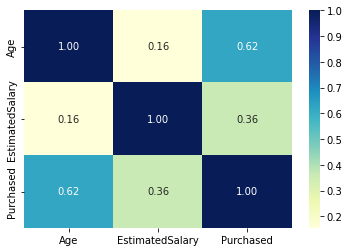

In [13]:
sns.heatmap(data.corr(), annot = True,fmt=".2f", cmap = 'YlGnBu' )
plt.show()

In [14]:
gender = pd.get_dummies(data['Gender'], drop_first=True)   #gender sütunu string değerler barındırır.
                                                       
dataset = pd.concat([gender, data], axis=1)
data.drop(columns=['Gender'], axis=1, inplace=True)

In [15]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
x = data.iloc[:, [0,1]].values    #Features
y = data.iloc[:, 2].values     #Targets

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)          #feature scaling yapılır.

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
print("score: ", classifier.score(x_test,y_test))

score:  0.91


In [23]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
print(matrix)

[[62  6]
 [ 3 29]]


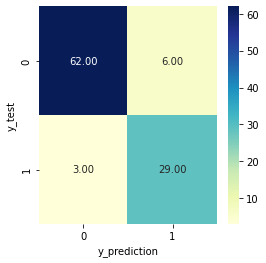

In [24]:
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y_prediction")
plt.ylabel("y_test")
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



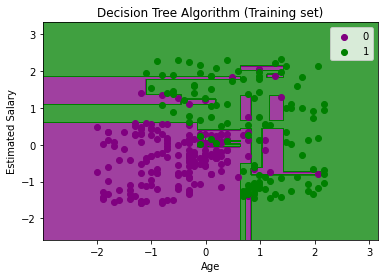

In [28]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Decision Tree Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

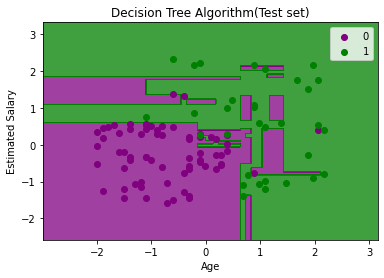

In [29]:
#Visulaizing the test set result
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Decision Tree Algorithm(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors= 5)
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC(C=1)

In [31]:
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
logreg.fit(x_train,y_train)
svm.fit(x_train,y_train)
nb.fit(x_train,y_train)

GaussianNB()

In [32]:
y_pred_dt = dt.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_logreg = logreg.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_nb = nb.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test,y_pred_dt)
acc_knn = accuracy_score(y_test,y_pred_knn)
acc_logreg = accuracy_score(y_test,y_pred_logreg)
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_nb = accuracy_score(y_test,y_pred_nb)

In [34]:
print("Accuracy Score of Decision Tree : ",acc_dt)
print("Accuracy Score of KNN : ",acc_knn)
print("Accuracy Score of Logistic Regression : ",acc_logreg)
print("Accuracy Score of SVM : ",acc_svm)
print("Accuracy Score of Naive Bayes : ",acc_nb)

Accuracy Score of Decision Tree :  0.9
Accuracy Score of KNN :  0.93
Accuracy Score of Logistic Regression :  0.89
Accuracy Score of SVM :  0.93
Accuracy Score of Naive Bayes :  0.9


In [43]:
from sklearn.metrics import confusion_matrix
cm_matrix_dt=confusion_matrix(y_test, y_pred_dt)
cm_matrix_knn=confusion_matrix(y_test, y_pred_knn)
cm_matrix_logreg=confusion_matrix(y_test, y_pred_logreg)
cm_matrix_svm=confusion_matrix(y_test, y_pred_svm)
cm_matrix_nb=confusion_matrix(y_test, y_pred_nb)

print("DT:", cm_matrix_dt)
print("KNN:" ,cm_matrix_knn)
print("LG:" ,cm_matrix_logreg)
print("SVM:" ,cm_matrix_svm)
print("NB:" ,cm_matrix_nb)

DT: [[62  6]
 [ 4 28]]
KNN: [[64  4]
 [ 3 29]]
LG: [[65  3]
 [ 8 24]]
SVM: [[64  4]
 [ 3 29]]
NB: [[65  3]
 [ 7 25]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

              preci